In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
tqdm.pandas()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Utilities

In [ ]:
def plotNormalizedBar(df, colName): # this is normalised between 0 and 1
    df[colName].value_counts(normalize=True).plot(kind='bar')

def plotBar(df, colName): # this is assolute values
    df[colName].value_counts(normalize=False).plot(kind='bar')

#### Data Collection & Cleaning

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Omdena/Data/TrashOut/AllData_ManualEdits.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df['continent'].unique()

array(['Asia', 'Australia', 'Oceania', 'South America', 'Africa',
       'Europe', nan, 'North America'], dtype=object)

In [ ]:
df.head()

,Unnamed: 0,id,latitude,longitude,continent,country,aa1,aa2,aa3,locality,subLocality,types,updateTime,updateNeeded,note,url,status,size,anonymous,created,accessibility,image
0,0,57823,32.354964,35.019643,Asia,Israel,Center District,HaSharon,NaN,Bahan,Bahan,domestic,2020-06-22T07:10:14.884Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,cleaned,bag,FALSE,2020-06-22T06:25:01.411Z,NaN,https://firebasestorage.googleapis.com/v0/b/tr...
1,1,57814,34.929792,32.862968,Asia,Cyprus,Limassol,NaN,NaN,NaN,Limassol,"deadAnimals,plastic",2020-06-21T11:17:53.751Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,bag,FALSE,2020-06-21T11:17:53.751Z,notForGeneralCleanup,https://firebasestorage.googleapis.com/v0/b/tr...
2,2,57758,40.235476,44.505753,Asia,Armenia,Kotayk Province,NaN,NaN,Zovuni,Zovuni,metal,2020-06-15T10:08:23.046Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,wheelbarrow,FALSE,2020-06-15T10:08:23.046Z,NaN,https://firebasestorage.googleapis.com/v0/b/tr...
3,3,57594,-6.119567,106.661225,Asia,Indonesia,Banten,Kota Tangerang,Benda,NaN,RW 010,"electronic,glass,metal,plastic,domestic",2020-06-04T12:22:35.542Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,car,FALSE,2020-06-04T12:22:35.542Z,byCar,https://firebasestorage.googleapis.com/v0/b/tr...
4,4,57585,-2.677623,118.889706,Asia,Indonesia,Sulawesi Barat,Kabupaten Mamuju,Kecamatan Mamuju,NaN,Binanga,"glass,metal,plastic,domestic",2020-06-02T22:06:37.892Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,car,FALSE,2020-06-02T22:06:37.892Z,byCar,https://firebasestorage.googleapis.com/v0/b/tr...


#### EDA

In [ ]:
df.dtypes

Unnamed: 0         int64
id                 int64
latitude         float64
longitude        float64
continent         object
country           object
aa1               object
aa2               object
aa3               object
locality          object
subLocality       object
types             object
updateTime        object
updateNeeded        bool
note              object
url               object
status            object
size              object
anonymous         object
created           object
accessibility     object
image             object
dtype: object

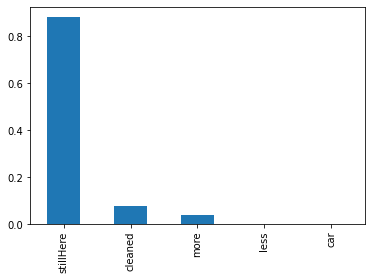

In [ ]:
plotNormalizedBar(df, 'status')

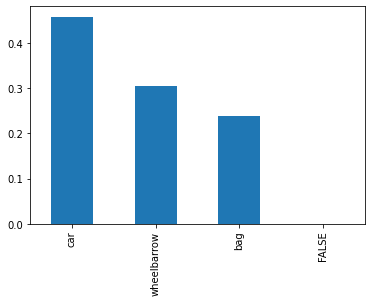

In [ ]:
plotNormalizedBar(df, 'size')

In [ ]:
df['types'] = df.types.astype('str')

In [ ]:
uniqueTypeValues = dict()

def populateUniqueTypes(typeString):
    for item in typeString.split(","):
        if item in uniqueTypeValues.keys():
            uniqueTypeValues.setdefault(item, 0)
            uniqueTypeValues.update({item: uniqueTypeValues[item] + 1})
        else:
            uniqueTypeValues[item] =  0
            
df.types.apply(populateUniqueTypes)

0        None
1        None
2        None
3        None
4        None
         ... 
56099    None
56100    None
56101    None
56102    None
56103    None
Name: types, Length: 56104, dtype: object

In [ ]:
uniqueTypeValues

{'automotive': 8999,
 'construction': 21212,
 'dangerous': 3291,
 'deadAnimals': 1508,
 'domestic': 33701,
 'electronic': 5498,
 'glass': 15546,
 'liquid': 4812,
 'metal': 15107,
 'nan': 8,
 'organic': 5129,
 'plastic': 30541}

In [ ]:
typeDf = pd.DataFrame(sorted(uniqueTypeValues.items(), key=lambda k: k[1], reverse=True), columns=['item', 'count'])

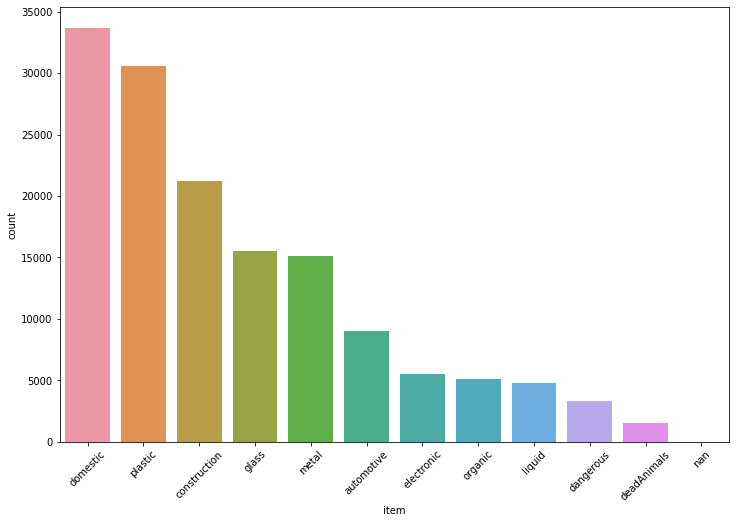

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(x='item', y='count', data=typeDf)

## Population Density

In [ ]:
import georasters as gr
georasters not installed properly...

ModuleNotFoundError: ignored

In [ ]:
raster = '/content/drive/My Drive/Omdena/Official folder for Trashout/Task_1/T1_Datasets/Population/gpw_v4_population_density_adjusted_to_2015_unwpp_country_totals_rev11_2020_2pt5_min.tif'
data = gr.open(raster)
type(data)

rasterio.io.DatasetReader

In [ ]:
popDf = data.to_pandas()

In [ ]:
popDf.head()

,row,col,value,x,y
0,152,3535,0.0,-32.708333,83.666667
1,152,3536,0.0,-32.666667,83.666667
2,152,3537,0.0,-32.625000,83.666667
3,153,3480,0.0,-35.000000,83.625000
4,153,3481,0.0,-34.958333,83.625000


In [ ]:
popDf.drop(['row', 'col'], axis=1, inplace=True)

##### Identifying row with latitude and longitude

In [ ]:
popDf['y'].min()

-55.95833333333351

In [ ]:
popDf['y'].max()

83.6666666666666

In [ ]:
popDf['x'].min()

-180.0

In [ ]:
popDf['x'].max()

179.9583333333336

In [ ]:
popDf.rename(columns={'x': 'lng', 'y': 'lat'}, inplace=True)

In [ ]:
popDf.shape

(9040743, 3)

### Merging density data with Trashout data

In [ ]:
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
df.head()

,id,latitude,longitude,continent,country,aa1,aa2,aa3,locality,subLocality,...,updateTime,updateNeeded,note,url,status,size,anonymous,created,accessibility,image
0,57823,32.3549638,35.019643,Asia,Israel,Center District,HaSharon,NaN,Bahan,Bahan,...,2020-06-22T07:10:14.884Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,cleaned,bag,False,2020-06-22T06:25:01.411Z,NaN,https://firebasestorage.googleapis.com/v0/b/tr...
1,57814,34.9297924,32.8629684,Asia,Cyprus,Limassol,NaN,NaN,NaN,Limassol,...,2020-06-21T11:17:53.751Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,bag,False,2020-06-21T11:17:53.751Z,notForGeneralCleanup,https://firebasestorage.googleapis.com/v0/b/tr...
2,57758,40.2354756,44.5057527,Asia,Armenia,Kotayk Province,NaN,NaN,Zovuni,Zovuni,...,2020-06-15T10:08:23.046Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,wheelbarrow,False,2020-06-15T10:08:23.046Z,NaN,https://firebasestorage.googleapis.com/v0/b/tr...
3,57594,-6.119567430318316,106.6612253538206,Asia,Indonesia,Banten,Kota Tangerang,Benda,NaN,RW 010,...,2020-06-04T12:22:35.542Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,car,False,2020-06-04T12:22:35.542Z,byCar,https://firebasestorage.googleapis.com/v0/b/tr...
4,57585,-2.6776231080318587,118.8897062559788,Asia,Indonesia,Sulawesi Barat,Kabupaten Mamuju,Kecamatan Mamuju,NaN,Binanga,...,2020-06-02T22:06:37.892Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,car,False,2020-06-02T22:06:37.892Z,byCar,https://firebasestorage.googleapis.com/v0/b/tr...


In [ ]:
df.drop(df.loc[df.continent.isin(['true', 'false'])].index, inplace=True)

##### Reducing precision of the data

In [ ]:
def roundOffLatLng(value):
    return round(value, 6)

In [ ]:
df['latitude'] = df['latitude'].astype('float')
df['longitude'] = df['longitude'].astype('float')

In [ ]:
df['latitude'] = df['latitude'].apply(roundOffLatLng)
df['longitude'] = df['longitude'].apply(roundOffLatLng)

In [ ]:
popDf['lat'] = popDf['lat'].apply(roundOffLatLng)
popDf['lng'] = popDf['lng'].apply(roundOffLatLng)

In [ ]:
popDf.head()

,value,lng,lat
0,0.0,-32.708333,83.666667
1,0.0,-32.666667,83.666667
2,0.0,-32.625000,83.666667
3,0.0,-35.000000,83.625000
4,0.0,-34.958333,83.625000


In [ ]:
import reverse_geocoder as rg

The data needs to be mapped to the country code first before we add the population density feature to the Trash data. This is to prevent any issues that might arise due to capitalisation or spelling of the countries in both the data

In [ ]:
#https://stackoverflow.com/questions/20169467/how-to-convert-from-longitude-and-latitude-to-country-or-city

import requests

from shapely.geometry import mapping, shape
from shapely.prepared import prep
from shapely.geometry import Point


data = requests.get("https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson").json()

countries = {}
for feature in data["features"]:
    geom = feature["geometry"]
    country = feature["properties"]["ISO_A2"]
    countries[country] = prep(shape(geom))

In [ ]:
#Function to get country code

def getCountryName(lat, lng):
    point = Point(lng, lat)
    for country, geom in countries.items():
        if geom.contains(point):
            return country
    return "unknown"

In [ ]:
#Function to calculate haversine distance between 2 points and return the population density of the nearest LatLng value
def mapPopulationDensity(row):
    country, lat, lng = row['cc'], row['latitude'], row['longitude']
    
    if (country == 'unknown'):
        return -1
    
    filteredDf = popDf.loc[popDf['cc'] == country]
    
    latList = np.deg2rad(filteredDf['lat'])
    lngList = np.deg2rad(filteredDf['lng'])
    lat = np.deg2rad(lat)
    lng = np.deg2rad(lng)
    
    latDistance = lat - latList
    lngDistance = lng - lngList
    
    a = np.sin(latDistance/2)**2 + np.cos(lat) * np.cos(filteredDf['lat']) * np.sin(lngDistance/2)**2
    d = 6371 * 2 * np.arcsin(np.sqrt(a))

    try:
        #d now is an array of distances
        if (np.amin(d) > 50) or (filteredDf.shape[0] == 0):
            return -1
        else:
            return filteredDf.iloc[int(np.where(d == np.amin(d))[0][0]), filteredDf.columns.get_loc('value')]
    except Exception as e:
        print("Error occured: " + str(e))
        return -1

In [ ]:
df['cc'] = df.progress_apply(lambda x: getCountryName(x['latitude'], x['longitude']), axis=1)

100%|███████████████████████████████████████████████████████████████████████████| 56106/56106 [01:35<00:00, 587.82it/s]


In [ ]:
popDf['cc'] = popDf.progress_apply(lambda x: getCountryName(x['lat'], x['lng']), axis=1)

100%|█████████████████████████████████████████████████████████████████████| 9040743/9040743 [3:49:58<00:00, 655.21it/s]


We now have the country codes ready using which we can merge the data. It seems the density data has data for a lot more countries which we don't require, we can drop them. We can also drop any unknown values that we have, in the density data

In [ ]:
len(df['cc'].unique())

153

In [ ]:
len(popDf['cc'].unique())

231

In [ ]:
popDf = popDf[popDf['cc'] != 'unknown']

In [ ]:
popDf = popDf.loc[popDf['cc'].isin(df['cc'].unique())]

In [ ]:
popDf.head()

,value,lng,lat,cc
4375,0.000022,-72.750000,83.083333,CA
4376,0.000022,-72.708333,83.083333,CA
4377,0.000022,-72.666667,83.083333,CA
4378,0.000022,-72.625000,83.083333,CA
4379,0.000022,-72.583333,83.083333,CA


In [ ]:
df['pop_density'] = df.progress_apply(mapPopulationDensity, axis=1)

  0%|▏                                                                           | 184/56106 [01:43<9:41:54,  1.60it/s]